# Emerging Tech Tasks
### By Joshua Uzell
***
Below are a list of tasks that I completed over the semester. Note that some of the code presented was written with the aid of Open AI's ChatGPT, though all comments and explainations were written in my own words.

## Task 1 - The Collatz Conjecture
***

According to **Daniel John Thompson** from the **Royal Australian Chemical Institue**, the **Collatz Conjecture** is a mathematics problem set forth by mathematician **Lothar Collatz** in 1937. It proposes that if you take any whole positive number of type 'n', you can always reduce it down to the number one. This is done via 2 linear equations that either multiply 'n' by 3 and add on 1 if 'n' is odd, or simply divide 'n' by 2 if it's even. **[1]** (https://www.ripublication.com/atam22/atamv17n1_01.pdf) 

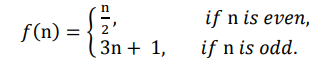

<h6>Image of a defined map of the Collatz Conjecture found via <a href="https://www.ripublication.com/atam22/atamv17n1_01.pdf">https://www.ripublication.com/atam22/atamv17n1_01.pdf</a> [1], 2022</h6>

Using python below, we are going to prove that the Collatz Conjecture holds true for the first 10,000 positive integers. Let's take a look.

In [ ]:
def collatz(x):
    sequence = [x] #Begin with the sequence's first number
    while x != 1:
        if x % 2 == 0: #If x is even, divide by 2
            x = x // 2
        else:
            x = 3 * x + 1 #Else if its odd, multiply x by 3 and add 1
        sequence.append(x) #Add to sequence array
    return sequence #Return the sequence

#Check the Collatz Conjecture for the first 10,000 positive integers
for i in range(1, 10001): #Loop through the first 10,000 positive integers
    sequence = collatz(i) #Pass in each number and return the updated sequence
    if 1 not in sequence: #If 1 is not in the sequence, then the Collatz sequence didn't end at 1 which goes against the conjecture.
        print(f"The Collatz Conjecture failed for {i}")
        break
else:
    print("The Collatz Conjecture holds true for the first 10,000 positive integers.")

As you can see, we have successfully proven that the Collatz Conjecture holds true for the first 10,000 positive integers.

## Task 2 - Square Root Calculation
***

For this task we are asked to calculate the square root of a number without the need of a external library such as **'math'** package or the **double operator**. In other words we will be using **Newtons method** to solve this issue. In a MIT paper by **S. G. Johnson**, **Newtons Method** is an algorithm that begins with an inital guess for the square root of a number represented by **x(n)**, which leads to improved guesses over time until we get closer to the actual root of the solution. **[2]**(https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf)

Let's take a look at some python code below for calculating the square root of a floating point number.

In [ ]:
def sqrt(x):
    z_zero = 1.0 #This is the initial guess
    threshold = 0.01 #Used for checking if the difference between the previous guess and the next guess is less than this value
    z = z_zero #initilise z to the initial guess
    
    while True: #Loop through until the difference is less than the threshold
        z_plus_one = z - (z * z - x) / (2 * z)
        if abs(z - z_plus_one) < threshold: #If less than the threshold, return the value of the next guess
            return z_plus_one
        z = z_plus_one #update previous guess with the next guess for the next iteration of the loop

#Print out the results of the function 3 different times
print(sqrt(4.5))  #This should give a result close to 2.12
print(sqrt(9.6))  #A result close to 3.09
print(sqrt(28.2))  #A result close to 5.31



## Task 3 - A Functions (Mapping of Inputs to Outputs) Problem
***

For this task, we are asked to calculate the total number of unique mappings you can create with 4 boolean inputs and 1 boolean output. Since a bit can either be a 1 or 0 (which is 2 options) and there are 4 boolean inputs that could be either one of these bits, we can calculate this as  **2 to the power of 4** which would be 16 possible input mappings. Now since each of those 16 input mappings need to all have an output of either 1 or 0 (again 2 options) we specify this calculation as **2 to the power of 16** which gives us a number of 65,536 unique possible mappings.

We will create 2 functions. One called create_mapping() that creates a random mapping of 4 input bits (each bit being either a 0 or 1) with 16 possible combinations and gives back a single output of either 0 or 1. The other one called test_mapping() takes the mapping created in the first function, and runs it on all 16 combinations.

In [16]:
import itertools as it

In [17]:
import random

In [18]:
def create_mapping(): #Create a mapping that contains 4 input bits which gives us 16 possible combinations
    f_outputs = random.choice(list(it.product((0,1), repeat=2**4)))
    def f(a,b,c,d):
        i = a * 8 + b * 4 + c * 2 + d * 1 #This is the mapping
        return f_outputs[i]
    return f # return the mapping f


def test_mapping(f):
    print("All the possible mappings with 4 bits as input and a single bit as output:")
    for a, b, c, d in it.product((0, 1), repeat=4): #Loop through all possible inputs
        output = f(a, b, c, d)
        print(f"f({a}, {b}, {c}, {d}) = {output}")

f = create_mapping() #Creates an instance of the function and runs it
test_mapping(f) #Just tells you what the function is

All the possible mappings with 4 bits as input and a single bit as output:
f(0, 0, 0, 0) = 1
f(0, 0, 0, 1) = 0
f(0, 0, 1, 0) = 0
f(0, 0, 1, 1) = 0
f(0, 1, 0, 0) = 0
f(0, 1, 0, 1) = 0
f(0, 1, 1, 0) = 0
f(0, 1, 1, 1) = 0
f(1, 0, 0, 0) = 0
f(1, 0, 0, 1) = 1
f(1, 0, 1, 0) = 1
f(1, 0, 1, 1) = 1
f(1, 1, 0, 0) = 1
f(1, 1, 0, 1) = 0
f(1, 1, 1, 0) = 0
f(1, 1, 1, 1) = 1


## Task 4 - Matrix Multiplication
***

This task requires us to create a function that performs matrix multiplication on 2 rectangular lists (that we will call matrix A and B) that include floating point numbers. We first get the number of rows and columns from both matrix A and B. Then we check if the number of columns in matrix A matches the number of rows in matrix B. We then do a dot product calculation by multiplying rows of A to the columns of B and adding each multiplication result together to get our third resulting matrix.

We could use the NumPy library to efficiently perform this calculation but we'll do the manual way this time to get a better understanding of the calculation. 

In [19]:
def multiply_matrices(A, B):
    #Below represents the number of rows and columns in each matrix
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    #We check if the number of columns in matrix A match the number of rows in matrix B
    #so we can perform our matrix multiplication
    if cols_A != rows_B:
        raise ValueError("Ran into error. The number of columns in matrix A must be equal to number of rows in column B")

    #We fill out a matrix with zeros. This matrix will store the results of our matrix multiplication
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    #We perform our matrices multiplication here
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]

    return result #Return the resulting matrix


In [20]:
#Matrix A
A = [[1.0, 2.0, 3.0],
     [4.0, 5.0, 6.0]]

#Matrix B
B = [[7.0, 8.0],
     [9.0, 10.0],
     [11.0, 12.0]]

#Return the resulting third matrix
matrixResult = multiply_matrices(A,B)
print("Our third matrix is ")
print(matrixResult)

Our third matrix is 
[[58.0, 64.0], [139.0, 154.0]]


## References
***

[1] Thompson, D.J., 2022. Collatz Conjecture Proof. Advances in Theoretical and Applied Mathematics, 17(1), pp.1-5. Royal Australian Chemical Institute, Melbourne, Australia. ISSN 0973-4554. Available at: https://www.ripublication.com/atam22/atamv17n1_01.pdf. Accessed on 11th October 2023.

[2] Johnson, S.G., 2015. Square Roots via Newton’s Method. MIT Course 18.335. Available at: https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf. Accessed on 11th October 2023.

***
## End of Notebook